In [28]:
import tensorflow as tf
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from alibi.datasets import load_cats
from alibi.explainers import AnchorImage

from tensorflow_model import load_image
from PIL import Image

In [22]:
print('TF version: ', tf.__version__)
print('Eager execution enabled: ', tf.executing_eagerly()) # False

TF version:  2.8.0
Eager execution enabled:  True


In [23]:
model = tf.keras.applications.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

In [55]:
data = load_image("dog.jpg").reshape(-1, 224, 224, 3)
data = (data / 255).astype('float32')
image_shape = (224, 224, 3)
images = data

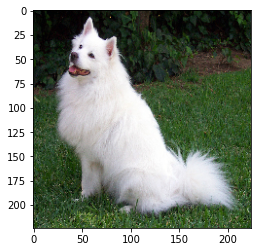

In [56]:
i = 0
plt.imshow(data[i]);

In [49]:
# Daten aus BSP
data, labels = load_cats(target_size=image_shape[:2], return_X_y=True)
print(f'Images shape: {data.shape}')
# rescale for VGG (only 1 image currently)
image_shape = (224, 244, 3)
data = np.array(Image.fromarray(data[0]).resize((224, 224)))
data = data.reshape((-1,) + data.shape)

Images shape: (4, 244, 224, 3)


In [50]:
images = preprocess_input(data)
preds = model.predict(images)
label = decode_predictions(preds, top=3)
print(label[0])

[('n02123045', 'tabby', 0.6709258), ('n02123159', 'tiger_cat', 0.20991822), ('n02124075', 'Egyptian_cat', 0.049793895)]


In [46]:
predict_fn = lambda x: model.predict(x)

# Initialize anchor image explainer

In [47]:
segmentation_fn = 'slic'
kwargs = {'n_segments': 15, 'compactness': 20, 'sigma': .5}
explainer = AnchorImage(predict_fn, image_shape, segmentation_fn=segmentation_fn,
                        segmentation_kwargs=kwargs, images_background=None)

# Explain a prediction

In [57]:
# rename such that code works
image = images[i]
np.random.seed(0)
explanation = explainer.explain(image, threshold=.95, p_sample=.5, tau=0.25)

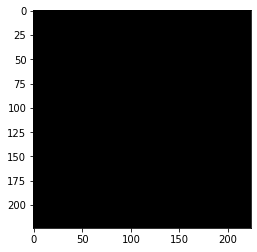

In [58]:
# für Hund: nur schwarz
# für Katze: kryptischer Ausschnitt von Katze
plt.imshow(explanation.anchor)

In [59]:
explanation.anchor.shape

(224, 224, 3)

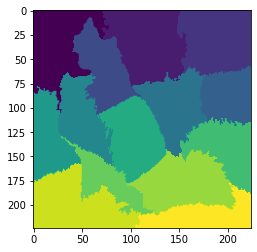

In [60]:
# A visualization of all the superpixels
plt.imshow(explanation.segments);